# Wine quality predictions

Our task is to predict the quality of a wine on a scale from 0 to 10.

Input variables: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol

Output variables: quality (score between 0 and 10)

Since there are no categorical variables, we are dealing with regression problem.

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [2]:
df = pd.read_csv("winequality-red.csv", delimiter=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Checking for correlations within our data:

In [3]:
correlations = df.corr()['quality'].drop('quality')
print(correlations)

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
Name: quality, dtype: float64


It would be better to visualise it with heatmap:

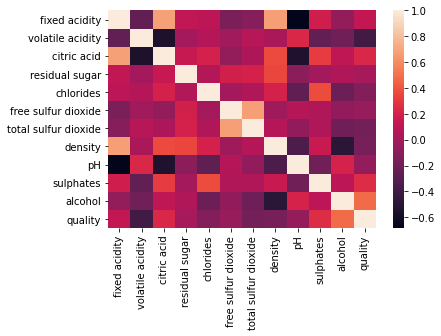

In [4]:
sns.heatmap(df.corr())
plt.show()

We want to include in our model only features that are not too correlated, to improve performace of our model.

In [5]:
def get_features(correlations, correlation_threshold):
    abs_corrs = correlations.abs()
    return (abs_corrs > correlation_threshold).index.values

In [6]:
features = get_features(correlations=correlations, correlation_threshold=0.01) 
print(features) 
x = df[features] 
y = df['quality']

['fixed acidity' 'volatile acidity' 'citric acid' 'residual sugar'
 'chlorides' 'free sulfur dioxide' 'total sulfur dioxide' 'density' 'pH'
 'sulphates' 'alcohol']


We split our dataset into a train and a test part.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Linear Regression

Since we have a regression problem, we will use `LinearRegression` from Sklearn.

In [8]:
from sklearn.linear_model import LinearRegression 

regressor = LinearRegression()
regressor.fit(x_train,y_train)

print(regressor.coef_)

[ 6.76452344e-02 -1.15066683e+00 -2.59561900e-01  2.70270066e-02
 -1.25108229e+00  5.25803751e-03 -2.95877159e-03 -4.23843413e+01
 -1.63418051e-01  7.77727760e-01  2.59662322e-01]


Once our model is trained, we can create some predictions

In [9]:
train_pred = regressor.predict(x_train)
#print(train_pred)
test_pred = regressor.predict(x_test) 
#print(test_pred)

Model performance:

In [10]:
print("R2 Score:\t{}\nRMSE (Train):\t{}\nRMSE (Test):\t{}".format(
            metrics.r2_score(y_test, test_pred), 
            metrics.mean_squared_error(y_train, train_pred)**0.5,
            metrics.mean_squared_error(y_test, test_pred)**0.5))

R2 Score:	0.3663708703637607
RMSE (Train):	0.642993085166987
RMSE (Test):	0.6582096605236956


## Random Forest Regressor

Sklearn provides several other regressors besides the `LinearRegression`. We will compare their performance with below. The first one that we will try is a `RandomForestRegressor`. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting

In [11]:
from sklearn.ensemble import RandomForestRegressor

random_forest_regr = RandomForestRegressor(max_depth=2, random_state=0)
random_forest_regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

Let's make some predictions:

In [12]:
random_forest_train_pred = random_forest_regr.predict(x_train)
random_forest_test_pred = random_forest_regr.predict(x_test)

And evaluate the model's performance:

In [13]:
print("R2 Score:\t{}\nRMSE (Train):\t{}\nRMSE (Test):\t{}".format(
            metrics.r2_score(y_test, random_forest_test_pred), 
            metrics.mean_squared_error(y_train, random_forest_train_pred)**0.5,
            metrics.mean_squared_error(y_test, random_forest_test_pred)**0.5))

R2 Score:	0.32418204570846776
RMSE (Train):	0.6533722674388078
RMSE (Test):	0.679769300854798


The random forest regressor made a little worse predictions than `LinearRegression` as we can see from higher values of RMSE (both for train and test data) and lower $R^2$ score.

## Adaboost Regressor

An AdaBoost regressor is an another meta-estimator included by Sklearn. It begins by fitting a regressor on the original dataset and then fits additional copies of the regressor on the same dataset but where the weights of instances are adjusted according to the error of the current prediction. As such, subsequent regressors focus more on difficult cases.

In [14]:
from sklearn.ensemble import AdaBoostRegressor

ada_regr = RandomForestRegressor(max_depth=2)
ada_regr.fit(x_train, y_train)

RandomForestRegressor(max_depth=2)

In [15]:
ada_train_pred = ada_regr.predict(x_train)
ada_test_pred = ada_regr.predict(x_test)

In [16]:
print("R2 Score:\t{}\nRMSE (Train):\t{}\nRMSE (Test):\t{}".format(
            metrics.r2_score(y_test, ada_test_pred), 
            metrics.mean_squared_error(y_train, ada_train_pred)**0.5,
            metrics.mean_squared_error(y_test, ada_test_pred)**0.5))

R2 Score:	0.3224627829706057
RMSE (Train):	0.6537027455185915
RMSE (Test):	0.6806334090655864


The score is similar to the `RandomForestRegressor`. `AdaBoostRegressor` didn't outperformed `LinearRegression`.

## GradientBoostingRegressor

The last regressor that we will try in this notebook is `GradientBoostingRegressor`. Gradient Boosting for regression builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regr = GradientBoostingRegressor()
gb_regr.fit(x_train, y_train)

GradientBoostingRegressor()

In [18]:
gb_train_pred = gb_regr.predict(x_train)
gb_test_pred = gb_regr.predict(x_test)

In [19]:
print("R2 Score:\t{}\nRMSE (Train):\t{}\nRMSE (Test):\t{}".format(
            metrics.r2_score(y_test, ada_test_pred), 
            metrics.mean_squared_error(y_train, gb_train_pred)**0.5,
            metrics.mean_squared_error(y_test, gb_test_pred)**0.5))

R2 Score:	0.3224627829706057
RMSE (Train):	0.4849509401911662
RMSE (Test):	0.6237676572470876


Despite the fact that Gradient Boosting Regressor's $R^2$ is higher that for `LinearRegression`, training and testing RMSE is smaller.

## Conclusion

We have taken a look at the wine quality prediction dataset and used several regressors from sklear package (namely `LinearRegression`, `RandomForestRegressor`, `AdaBoostRegressor` and `GradientBoostingRegressor`) to compare their performance. The `LinearRegression` had the highest $R^2$ score, while the `GradientBoostingRegressor` the lowest RMSE. 